## Final Project Submission

Please fill out:
* Student name: clyde ochieng
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita  
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## Overview


In the grand scheme of things, a youthful duo is in the midst of orchestrating the sale of their abode, harboring aspirations to elevate its market worth with minimal financial resources allocated for refurbishments. In a strategic move, the couple has opted to employ Multiple Linear Regression Modeling to meticulously scrutinize and prognosticate house sales trends in King County, leveraging specific attributes or variables. This analytical approach is poised to empower them with insights to navigate the market intelligently, thereby facilitating judicious decisions for maximizing profitability.

Following a rigorous evaluation process and numerous iterations of our linear regression models, it has been ascertained that the dimensions of living space and the quality grade of the construction exhibit the most pronounced correlation with an augmented selling price of the property.

## Business Problem


The business quandary at hand revolves around providing insightful counsel to prospective homeowners regarding the potential impact of home renovations on the estimated value of their properties, alongside quantifying the magnitude of such enhancements.

In addressing this issue, we aim to equip homeowners, both buyers and sellers, with invaluable insights that can inform their decisions in the real estate market. Our focus lies in scrutinizing key factors such as building grade and square footage of living space, among others, to unveil the correlations that exist between these features and home sale prices. This comprehensive analysis seeks to elucidate the most influential attributes driving property values, thereby empowering stakeholders to make informed and strategic decisions pertaining to their real estate endeavors.

### Hypothesis


In crafting our hypotheses, we put forward the following propositions:

Null Hypothesis (H0): Within our model, we posit that there is an absence of any substantial association between the independent variables and the dependent variable (target).

Alternative Hypothesis (H1): Contrarily, we assert that a meaningful relationship does exist between the independent variables and the dependent variable (target) within our model.

To guide our analytical journey and ensure robust conclusions, we have established a significance level (alpha) of 0.05. This chosen threshold will serve as a pivotal benchmark against which we evaluate the statistical significance of our findings and shape our ultimate recommendations for stakeholders.

### Questions to be analyzed


Let's articulate the questions we aim to explore through our analysis:

Q1: Which features show the strongest correlation with the price of a home?

Q2: Among the predicting variables, which features exhibit the most significant correlations with each other?

Q3: What combinations of features offer the most reliable predictions for home prices?

These questions form the cornerstone of our investigation, guiding our efforts to uncover key insights that will assist homeowners, buyers, and sellers alike in navigating the complex landscape of real estate with confidence and clarity.

## Data Understanding


In our quest to gain a comprehensive understanding of the data under scrutiny, we turn our attention to the King County Housing dataset. This dataset encapsulates a wealth of information pertaining to over 21,000 homes situated in King County.

Each entry in the dataset provides detailed insights into various attributes of the homes, encompassing factors such as the number of bedrooms, bathrooms, and floors, as well as the square footage of both living space and lot, the zip code, building grade, and condition, among others.

The dataset comprises a multitude of features, each potentially contributing to the final sale price of homes in King County. Below, we delineate the descriptions of these features, laying the groundwork for a thorough exploration and analysis.

##### King County Housing Data Columns 

Below is a comprehensive breakdown of the columns present in the King County Housing dataset:

- `id`: A unique identifier assigned to each house.
- `date`: The date on which the house was sold. (This column will be ignored for our analysis.)
- `price`: The sale price of the house, serving as our prediction target.
- `bedrooms`: The number of bedrooms in the house.
- `bathrooms`: The number of bathrooms in the house.
- `sqft_living`: The square footage of the living space within the house.
- `sqft_lot`: The square footage of the lot on which the house is situated.
- `floors`: The number of floors or levels present in the house.
- `waterfront`: A binary indicator denoting whether the house is situated on a waterfront.
- `view`: An indication of the quality of the view from the house. (This column will be ignored for our analysis.)
- `condition`: An assessment of the overall condition of the house.
- `grade`: An overall grade assigned to the house.
- `sqft_above`: The square footage of the house, excluding the basement. (This column will be ignored for our analysis.)
- `sqft_basement`: The square footage of the basement within the house. (This column will be ignored for our analysis.)
- `yr_built`: The year in which the house was built.
- `yr_renovated`: The year in which the house was renovated. (This column will be ignored for our analysis.)
- `zipcode`: The ZIP code corresponding to the location of the house. (This column will be ignored for our analysis.)
- `lat`: The latitude coordinate of the house. (This column will be ignored for our analysis.)
- `long`: The longitude coordinate of the house. (This column will be ignored for our analysis.)
- `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors. (This column will be ignored for our analysis.)
- `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors. (This column will be ignored for our analysis.)


### Explotory Data Analyis

As we set sail on our journey of exploration, our first port of call involves the pivotal task of importing the dataset. This foundational step lays the groundwork for our subsequent analyses and insights, ushering us into the realm of data-driven discovery and understanding.

In [1]:
#load necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

##### Eliminating Irrelevant Columns
In our quest for clarity and focus, we embark on the process of streamlining our dataset by removing columns that are deemed irrelevant to our current analysis. This strategic pruning ensures that we hone in on the most pertinent features, thereby enhancing the efficacy and interpretability of our subsequent explorations.

In [2]:
# reading the csv file
# eliminating irrelevant columns
df = pd.read_csv('data/kc_house_data.csv').drop(['date',
                                                 'view', 
                                                 'sqft_above', 
                                                 'sqft_basement', 
                                                 'yr_renovated',
                                                 'zipcode', 
                                                 'lat', 
                                                 'long', 
                                                 'sqft_living15',
                                                 'sqft_lot15'], axis = 1)
# previewing the DataFrame
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [3]:
df.shape

(21597, 11)

The dataset comprises 21,597 houses, each characterized by 11 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [6]:
# indepth statistics for price dataframe.
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


The dataset indicates that the average price of homes is $540,297. Prices within the dataset range from $78,000 to $8,000,000. Additionally, the median house price is reported to be $450,000.

In [7]:
# indepth statistics for square footage
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The dataset reveals that the mean square footage of living space is 2,080 sq-ft, with living space ranging from 370 sq-ft to 13,540 sq-ft. The median square footage is reported to be 1,910 sq-ft.

In [8]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

The bedroom counts in the dataset vary from 1 bedroom to 33 bedrooms.

In [9]:
df['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [10]:
df['floors'].value_counts()

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: count, dtype: int64

In [11]:
df['sqft_lot'].value_counts()

sqft_lot
5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: count, Length: 9776, dtype: int64

In [12]:
df['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [13]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64


The dataset indicates that houses were built between the years 1934 and 2014.

In [14]:
df['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [15]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

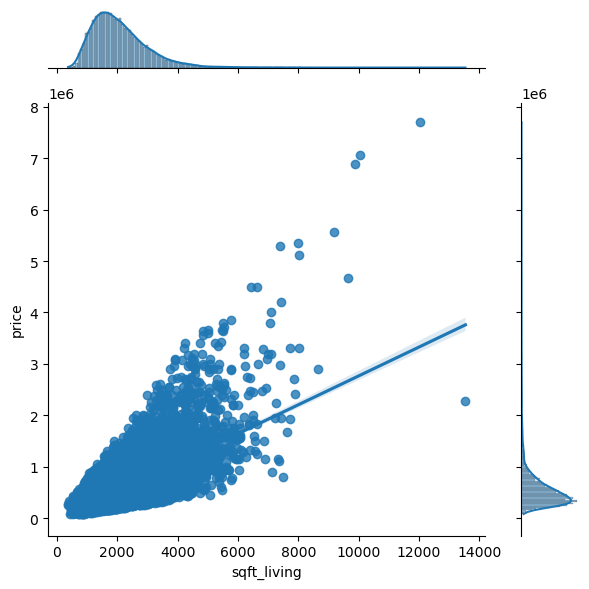

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'df' is your DataFrame containing the 'sqft_living' and 'price' columns

# Specify the column names as strings
sns_plot = sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
plt.tight_layout()

# Save the plot as a PNG file
sns_plot.savefig("jointplot.png")

plt.show()


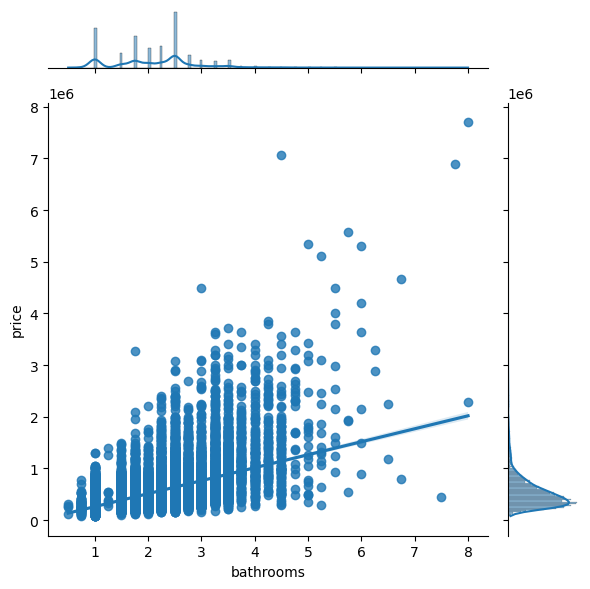

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#Use named argument for 'data'
sns_plot = sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
plt.tight_layout()

# Save the plot as a PNG file
sns_plot.savefig("jointplot.png")

plt.show()



## Data Preparation
Data preparation involves essential preprocessing and feature engineering steps to ensure tabular data is ready for statistical modeling.

Data Cleaning Steps
Handling Missing Values
Identify and address any missing values.

Handling Non-Numeric Data
Convert non-numeric data types to numeric ones.

This notebook provides a detailed breakdown of the steps used to compile, clean, and transform our data. It explores various iterations and examines the effects of different transformations on the dataset.

### Preprocessing with Scikit-learn
We'll delve into exploring and cleaning our dataset to prepare it for our Linear Regression Model.

Preprocessing Steps
1. Dealing with Missing Values
2. Converting Categorical Features to Numeric
3. Detecting and Eliminating Outliers

##### Missing Values
Below, we'll verify if there are any NaNs present in our dataset.

In [18]:
#locate missing values
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [19]:
#dealing with missing values
for column in df.columns:
    percentage_of_nan = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, percentage_of_nan)

id 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
condition 0.0
grade 0.0
yr_built 0.0


The 'waterfront' feature stands out as the only one containing missing values, approximately 11% of which are represented as NaNs. It's crucial to delve into this feature to address these gaps in data.

In [20]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64


Since the 'waterfront' feature consists solely of two values, 'yes' or 'no', we can infer that NaN values indicate 'no', as they imply the absence of waterfront property in the residences.

In [21]:
df['waterfront'].fillna('NO', inplace=True)

In [22]:
df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

In [23]:
#confirm missing values
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

##### Transform categorical features into numerical representations


Our model may encounter issues due to non-numeric columns. While numeric features are compatible, these specific features require conversion:

* waterfront (object)
* condition (object)
* grade (object)
Let's examine the value counts for these features to understand their distributions:

In [24]:
print(df['waterfront'].value_counts())
print()
print(df['condition'].value_counts())
print()
print(df['grade'].value_counts())

waterfront
NO     21451
YES      146
Name: count, dtype: int64

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64


##### create a function to split the numeric value from the 'grade' feature.


The Grade feature lists the numeric grade at the beginning, even though it's stored as an object data type. We'll employ a straightforward string split function to isolate the numeric portion of the feature.

Waterfront, with only 2 categories, can be directly converted into binary. However, Condition, with more than 2 categories, will require expansion into multiple columns.

In [25]:
df = df.assign(grade=df.grade.str.split(' ')).explode('grade')

In [26]:
df.duplicated().value_counts()

False    46360
True         6
Name: count, dtype: int64

In [27]:
df = df.drop_duplicates()

In [28]:
df.shape

(46360, 11)

In [29]:
df = df.drop_duplicates(subset='id')

In [30]:
df.dropna()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,Average,8,2004


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [32]:
df['grade'].value_counts()

grade
7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: count, dtype: int64

common buiding grade is a 7

In [33]:
# Change the data from object to int.
df['grade'] = df['grade'].astype(int)

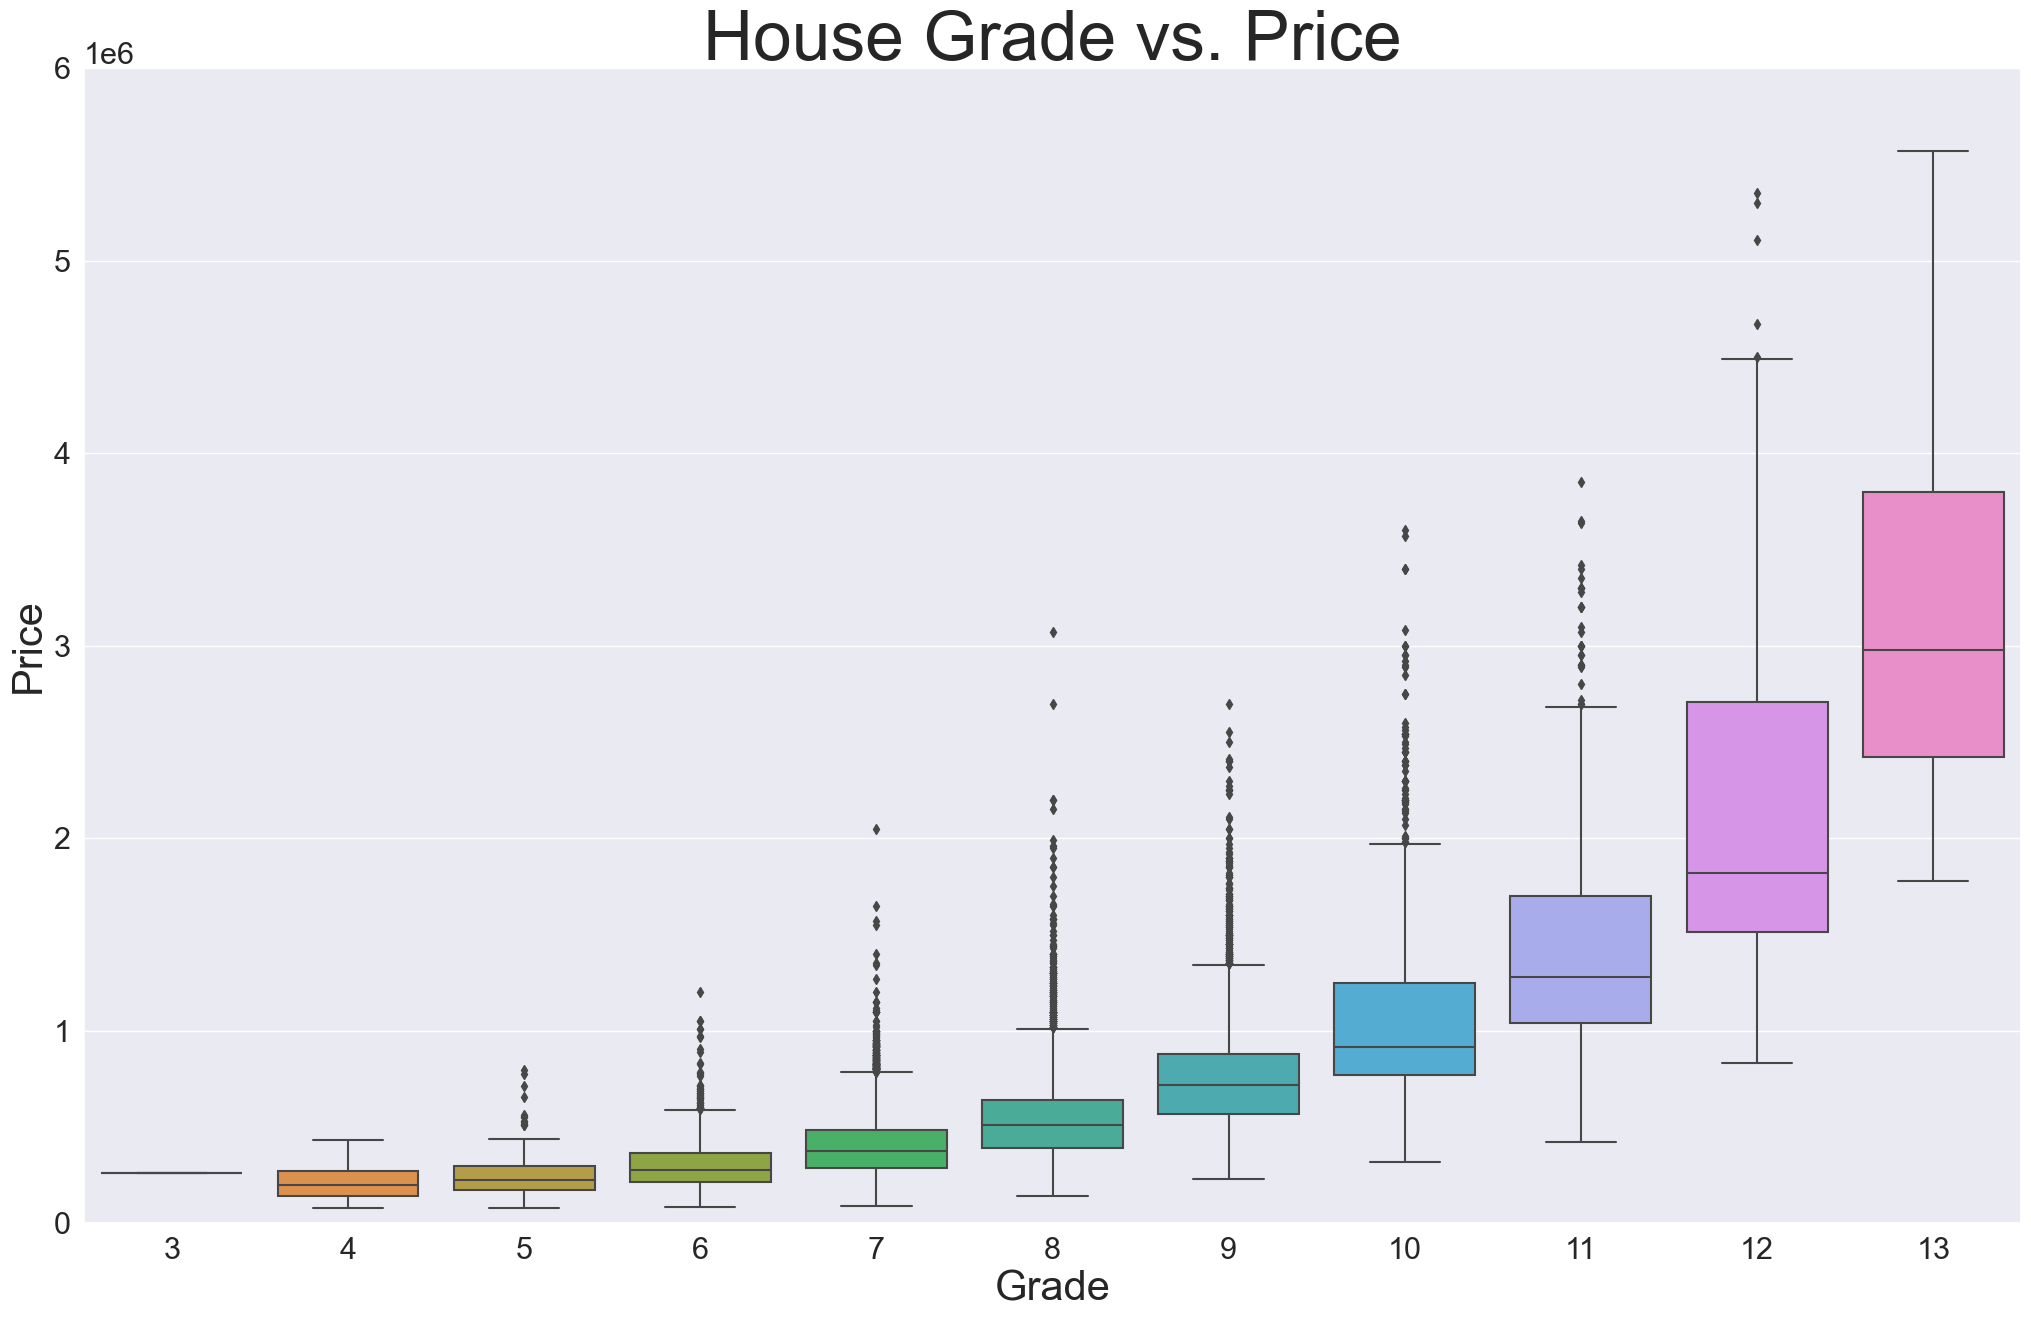

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set(font_scale=2)
ax = sns.boxplot(x="grade", y="price", data=df)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)

plt.savefig('grade.png')



Upon examining the grade feature, it becomes evident that as the categorical building grade designation improves, there's a corresponding increase in house prices.

##### Binary Categories : OrdinalEncoder
To convert binary categories like Waterfront into binary values using an OrdinalEncoder, follow these steps:

Identify the data to be transformed.
Instantiate the OrdinalEncoder object.
Fit the OrdinalEncoder object to the data.
Transform the data using the fitted encoder object.

In [35]:
# create a variable waterfront_train that contains the
# relevant column from df
waterfront_train = df[['waterfront']]

# Initiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# Fit the encoder on waterfront_train
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [36]:
# Transform waterfront_train using the encoder and 
# assign the result to waterfront_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

#Visually inspect waterfront_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
# Replace value of Street
df['waterfront'] = waterfront_encoded_train

# Visually inspect df
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,Average,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,Average,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,Average,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,Average,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,Average,8,2004


In [38]:
df['waterfront'].value_counts()

waterfront
0.0    21274
1.0      146
Name: count, dtype: int64

##### Transforming the 'condition' column using .map()

In [39]:
df['condition'].value_counts()

condition
Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: count, dtype: int64

In [40]:
condition_mapping = {
    "Average": 3,
    "Good": 4,
    "Very Good": 5,
    "Fair": 2,
    "Poor": 1
}

In [41]:
df['condition'].map(condition_mapping)

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21420, dtype: int64

In [42]:
df['condition'] = df['condition'].map(condition_mapping)
df['condition'].value_counts()

condition
3    13900
4     5643
5     1687
2      162
1       28
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  float64
 8   condition    21420 non-null  int64  
 9   grade        21420 non-null  int32  
 10  yr_built     21420 non-null  int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.9 MB


##### Outliers:

The dataset contains both single-family and multi-family units. For instance, those with more than 8 bedrooms or more than 5 bathrooms. To better analyze these distinct building types, we've opted to segregate them. Therefore, we've chosen to eliminate rows containing any outlier values."

In [44]:
# define function to describe outliers
def outliers_description(df):
    print('Outlier Data Description')
    describe = df.describe()

    describe.loc['+3_std'] = describe.loc['mean'] + (describe.loc['std'] * 3)
    describe.loc['-3_std'] = describe.loc['mean'] - (describe.loc['std'] * 3)
    print(describe)

In [45]:
outliers_description(df)

Outlier Data Description
                  id         price      bedrooms     bathrooms   sqft_living  \
count   2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean    4.580940e+09  5.407393e+05      3.373950      2.118429   2083.132633   
std     2.876761e+09  3.679311e+05      0.925405      0.768720    918.808412   
min     1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%     2.123537e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%     3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%     7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max     9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   
+3_std  1.321122e+10  1.644533e+06      6.150163      4.424589   4839.557868   
-3_std -4.049344e+09 -5.630540e+05      0.597736     -0.187731   -673.292602   

            sqft_lot        floors    waterfront     condition         grade  \
count   2.1420

##### Removing Outliers Beyond 3 Standard Deviations from the Mean

In [46]:
def remove_outliers(df, features):
    print("Outliers Removed Count")
    
    x = len(df)
    
    for feature in features:
        df[feature + '_zscore'] = np.abs(stats.zscore(df[feature]))
        y = df.loc[np.abs(df[feature + '_zscore']) > 3]
        percent = round((len(y) * 100) / x, 3)
        
        print(len(y), "outliers removed for", feature)
        
        df = df.loc[np.abs(df[feature + '_zscore']) < 3]
        
        df = df.drop([feature + '_zscore'], axis=1)
    
    return df

In [47]:
outliers = df[['bedrooms', 'bathrooms', 'sqft_living']]
df = remove_outliers(df, outliers)

Outliers Removed Count
62 outliers removed for bedrooms
171 outliers removed for bathrooms
209 outliers removed for sqft_living


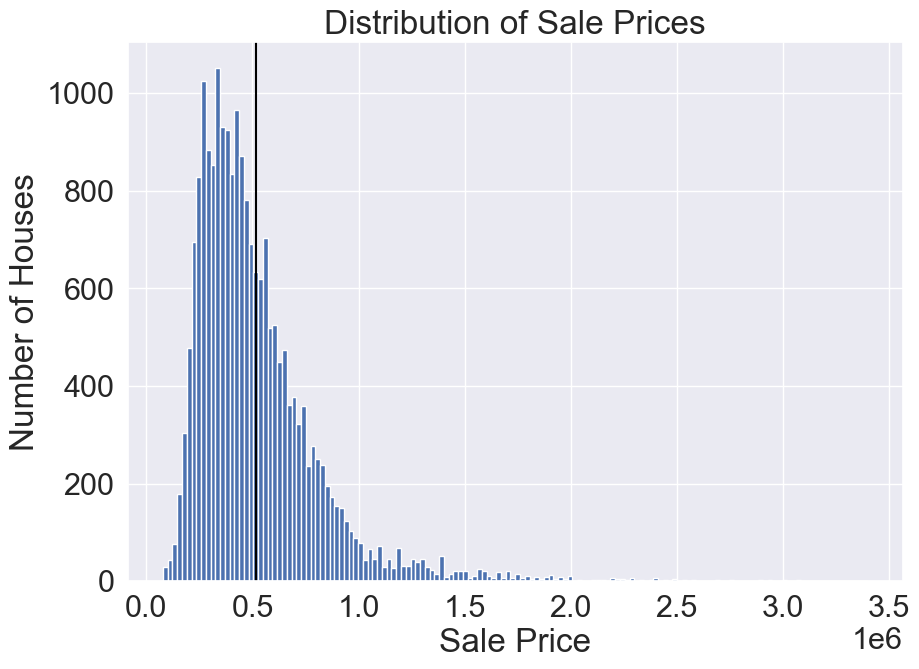

In [48]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, save_path=None):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Save plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plot_histogram(
    df,
    "price",
    "Distribution of Sale Prices",
    "Sale Price",
    "Number of Houses",
    save_path="histogram.png"
)


In [49]:
def print_stats(df, column):    
    print("Mean:              ", df[column].mean())
    print("Median:            ", df[column].median())
    print("Standard Deviation:", df[column].std())
    
print_stats(df, "price")

Mean:               518066.6351415769
Median:             447000.0
Standard Deviation: 301071.6722828131


It appears to follow a log-normal distribution. The majority of houses in this sample cluster around the median value of $447,000. However, the presence of higher-end homes is pushing the mean up to over $518,066.

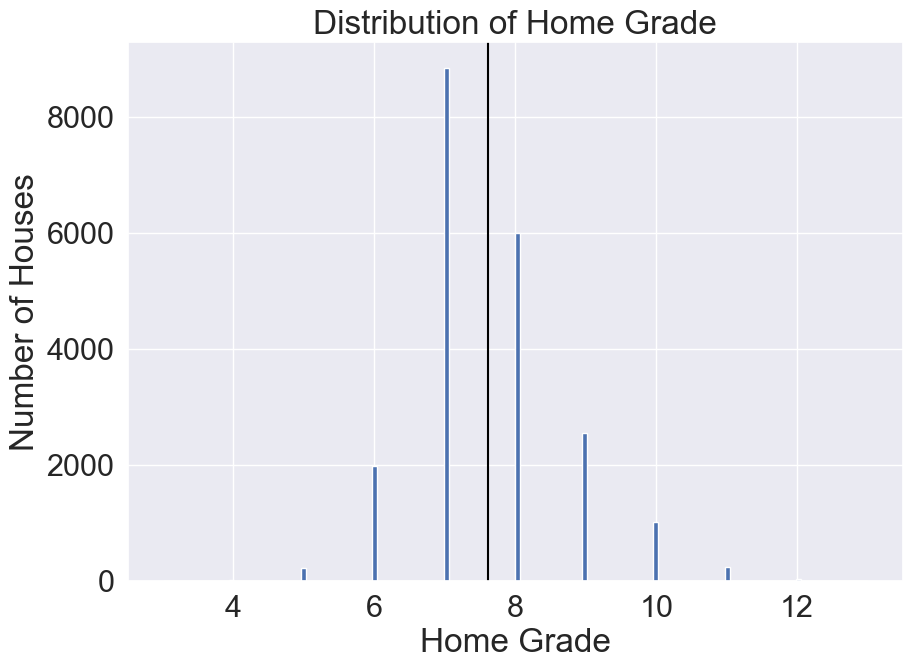

In [50]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, save_path=None):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Save plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plot_histogram(
    df,
    "grade",
    "Distribution of Home Grade",
    "Home Grade",
    "Number of Houses",
    save_path="grade_histogram.png"
)


In [51]:
print_stats(df, 'grade')

Mean:               7.610115358947469
Median:             7.0
Standard Deviation: 1.1050580688804281


Grade is approximately normally distributed.

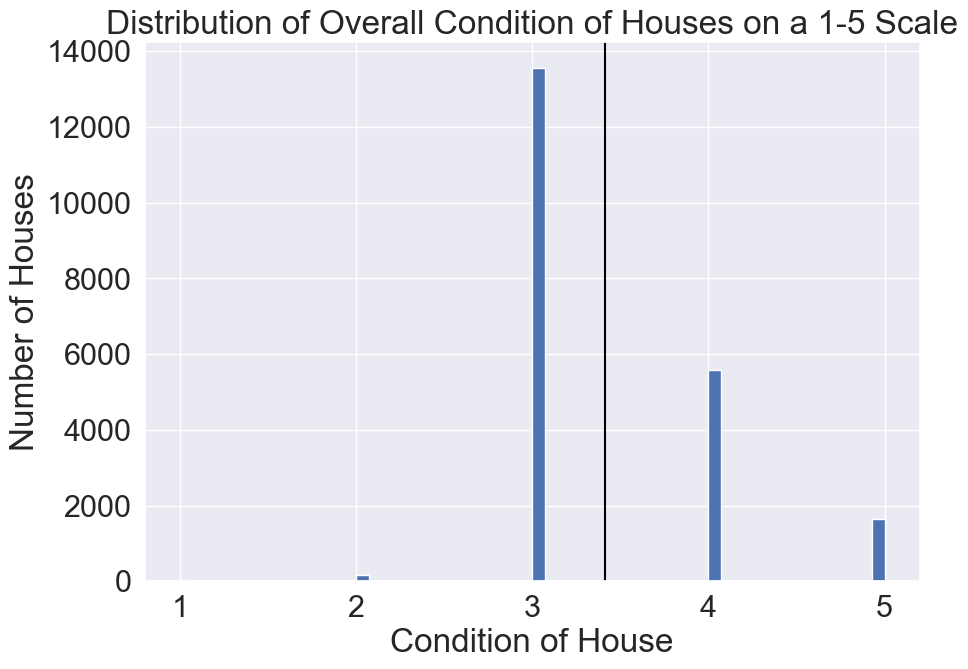

In [52]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, save_path=None):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Save plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plot_histogram(
    df,
    "condition",
    "Distribution of Overall Condition of Houses on a 1-5 Scale",
    "Condition of House",
    "Number of Houses",
    save_path="condition_histogram.png"
)


In [53]:
print_stats(df, 'condition')

Mean:               3.4131947754790732
Median:             3.0
Standard Deviation: 0.6509397347766206
